# Credit Card Fraud Detector

**Practical Motivation | Problem Formulation**

**Background** 

Credit card fraud is a growing concern in today's digital age with vast implications in terms of cost on the government, corporate organizations, financial industry and consumers. With the widespread proliferation of the internet technology, this had led to increased convenience with credit card transactions. However, this has resulted in the expedition of credit card frauds as well. In a CNA article, about $500,000 was stolen in fraudulent card payments involving diversion of SMS one-time passwords, from September to December 2020. This leads us to our mini project which is to leverage on machine learning to effectively detect credit card fraud. 

**What is credit card fraud?** 

Credit card fraud involves the unauthorized use of another individual's credit card or account information to make unauthorized payments or access of funds. 

**Problem statement** 

The credit card detection problem involves modelling past credit card transactions with the knowledge of the ones that turned out to be fraudulent. The model will then be tested on a test set to see if we can accurately identify which transaction is fraudulent. We aim to achieve a 100% accuracy rate in detection. With the success of the credit card fraud detector, we would be able to greatly minimize the potential loss of large amounts of funds, saving consumers and businesses the time and resources needed to resolve the fraud transaction. Moreover, being able to recognize fraudulent credit card transactions mitigates against the costs that consumers may incur for items they did not purchase. 

**Challenges** 

Credit card transaction datasets are highly imbalanced and skewed. Imbalanced data can negatively affect model performance and precision because we are using a binary classifier (Fraud vs no fraud). We may also end up with the problem where a low FPR is obtained despite high number of false positives.  Furthermore, fraudulent behavior profile is dynamic and tend to look like legitimate transactions, thereby making it difficult to detect.  

**Sample Collection**

Dataset: https://www.kaggle.com/kartik2112/fraud-detection?select=fraudTrain.csv

It is a simulated credit card transaction dataset containing legitimate and fraudulent transactions from the duration of 1 January 2019 – 31 Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants. Simulation source is from Sparkov Data Generation | Github tool created by Brandon Harris. 

**Variables** 

1. **index** - Unique Identifier for each row 


2. **transdatetrans_time** - Transaction DateTime 


3. **cc_num** - Credit Card Number of Customer


4. **merchant** - Merchant Name


5. **category** - Category of Merchant


6. **amt** - Amount of Transaction


7. **first** - First Name of Credit Card Holder


8. **last** - Last Name of Credit Card Holder 


9. **gender** - Gender of Credit Card Holder 


10. **street** - Street Address of Credit Card Holder 


11. **city** - City of Credit Card Holder 


12. **state** - State of Credit Card Holder 


13. **zip** - Zip of Credit Card Holder 


14. **lat** - Latitude Location of Credit Card Holder 


15. **long** - Longitude Location of Credit Card Holder 


16. **city_pop** - Credit Card Holder's City Population 


17. **job** - Job of Credit Card Holder


18. **dob** - Date of Birth of Credit Card Holder


19. **trans_num** - Transaction Number 


20. **unix_time** - UNIX Time of transaction 


21. **merch_lat** - Latitude Location of Merchant


22. **merch_long** - Longitude Location of Merchant 


23. **is_fraud** - Fraud Flag <--- Target Class 

# Content Section

- **Understanding the dataset and cleaning**


- **Exploratory Data Analysis (EDA)**


- **Feature Engineering**


- **Split Models**


- **Feature Label Encoding**


- **Feature Selection**


- **Scaling**
    1. Robust Scaler
    2. MinMax Scaler
    3. Standard Scaler
    
    
- **Class imbalance**
    1. Under sampling
    2. Over sampling
    3. SMOTE   
    


- **Model building and testing**
    1. XGBoost  
    2. K Nearest Neighbors        
    3. Naive Bayes (Gaussian)    


- **Compare results and conclusion**


- **Lessons learnt**

In [1]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns
from haversine import haversine, Unit
#!pip install haversine
import math
import matplotlib
import sklearn

In [2]:
df=pd.read_csv('fraudTest.csv')

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

From the info, the number of rows is 555,718. This is a significant amount of data and as such we will reduce this amount by a scale of 0.1. Note that we will scale each of the classes 'is_fraud'=1 and 'is_fraud'=0 before concatenating the two extracted sets together.

## Extraction

In [5]:
Fraud = df[df['is_fraud'] == 1] 
Fraud = Fraud.sample(frac=0.01) 
NotFraud = df[df['is_fraud'] == 0] 
NotFraud = NotFraud.sample(frac=0.01) 
data = pd.concat([Fraud, NotFraud]) 
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5557 entries, 300776 to 423231
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5557 non-null   int64  
 1   trans_date_trans_time  5557 non-null   object 
 2   cc_num                 5557 non-null   int64  
 3   merchant               5557 non-null   object 
 4   category               5557 non-null   object 
 5   amt                    5557 non-null   float64
 6   first                  5557 non-null   object 
 7   last                   5557 non-null   object 
 8   gender                 5557 non-null   object 
 9   street                 5557 non-null   object 
 10  city                   5557 non-null   object 
 11  state                  5557 non-null   object 
 12  zip                    5557 non-null   int64  
 13  lat                    5557 non-null   float64
 14  long                   5557 non-null   float64
 1

After extraction, the number of entries has been reduced to 5557 from 555,718.

In [6]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
300776,300776,2020-10-12 18:55:10,38530489946071,fraud_Lynch-Wisozk,home,195.69,Laura,Johns,F,95835 Garcia Rue,...,34.9572,-81.9916,530,Animal technologist,1989-05-14,4cb1d1439319d203d59ba5ea6aca331e,1381604110,35.205983,-82.237615,1
167875,167875,2020-08-18 18:24:34,213112402583773,fraud_Kovacek Ltd,travel,10.23,Ana,Howell,F,4664 Sanchez Common Suite 930,...,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,3a19fe44bfdf260f630d0ad080015270,1376850274,33.206609,-81.492893,1
149591,149591,2020-08-12 01:11:47,374497717543058,"fraud_Connelly, Reichert and Fritsch",gas_transport,21.36,Linda,Hurst,F,31701 Tucker Square Suite 893,...,47.1709,-100.7944,1190,"Designer, ceramics/pottery",1948-06-30,a2396938b0ce4bf12ffe4d2e23bd29d3,1376269907,46.790710,-100.770034,1
180711,180711,2020-08-23 22:28:35,30560609640617,fraud_Mayert Group,shopping_pos,785.58,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,c15ef0d69af6414c4889a08c53659056,1377296915,40.225117,-92.611539,1
26219,26219,2020-06-30 00:16:08,571844099986,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,302.75,Susan,Mills,F,005 Cody Estates,...,38.2507,-85.7476,736284,Engineering geologist,1952-04-02,16ded14a96590df73cefe07a030feef8,1372551368,38.526678,-85.630686,1


In [7]:
#Reset the indexes
data = data.reset_index(drop=True)
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,300776,2020-10-12 18:55:10,38530489946071,fraud_Lynch-Wisozk,home,195.69,Laura,Johns,F,95835 Garcia Rue,...,34.9572,-81.9916,530,Animal technologist,1989-05-14,4cb1d1439319d203d59ba5ea6aca331e,1381604110,35.205983,-82.237615,1
1,167875,2020-08-18 18:24:34,213112402583773,fraud_Kovacek Ltd,travel,10.23,Ana,Howell,F,4664 Sanchez Common Suite 930,...,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,3a19fe44bfdf260f630d0ad080015270,1376850274,33.206609,-81.492893,1
2,149591,2020-08-12 01:11:47,374497717543058,"fraud_Connelly, Reichert and Fritsch",gas_transport,21.36,Linda,Hurst,F,31701 Tucker Square Suite 893,...,47.1709,-100.7944,1190,"Designer, ceramics/pottery",1948-06-30,a2396938b0ce4bf12ffe4d2e23bd29d3,1376269907,46.790710,-100.770034,1
3,180711,2020-08-23 22:28:35,30560609640617,fraud_Mayert Group,shopping_pos,785.58,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,c15ef0d69af6414c4889a08c53659056,1377296915,40.225117,-92.611539,1
4,26219,2020-06-30 00:16:08,571844099986,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,302.75,Susan,Mills,F,005 Cody Estates,...,38.2507,-85.7476,736284,Engineering geologist,1952-04-02,16ded14a96590df73cefe07a030feef8,1372551368,38.526678,-85.630686,1


In [8]:
#Finding unique values in each column
data.nunique()

Unnamed: 0               5557
trans_date_trans_time    5556
cc_num                    879
merchant                  689
category                   14
amt                      4311
first                     330
last                      456
gender                      2
street                    879
city                      810
state                      50
zip                       868
lat                       866
long                      867
city_pop                  796
job                       470
dob                       865
trans_num                5557
unix_time                5556
merch_lat                5554
merch_long               5557
is_fraud                    2
dtype: int64

## Check for NULL values

In [9]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Alright clearly there is **NO** missing values to correct!

# Checking for duplicates

In [10]:
duplicate = data[data.duplicated()]
print("Duplicate Rows : ")
duplicate

Duplicate Rows : 


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


We can observe that there are **NO** duplicated rows for us to remove. 

## Exploratory Data Analysis (EDA) 

**Data Visualization**

It seems clear that 'Unnamed: 0' is just the index variable and not useful as a numeric data. So we will drop it when we visualise the correlation plot. 

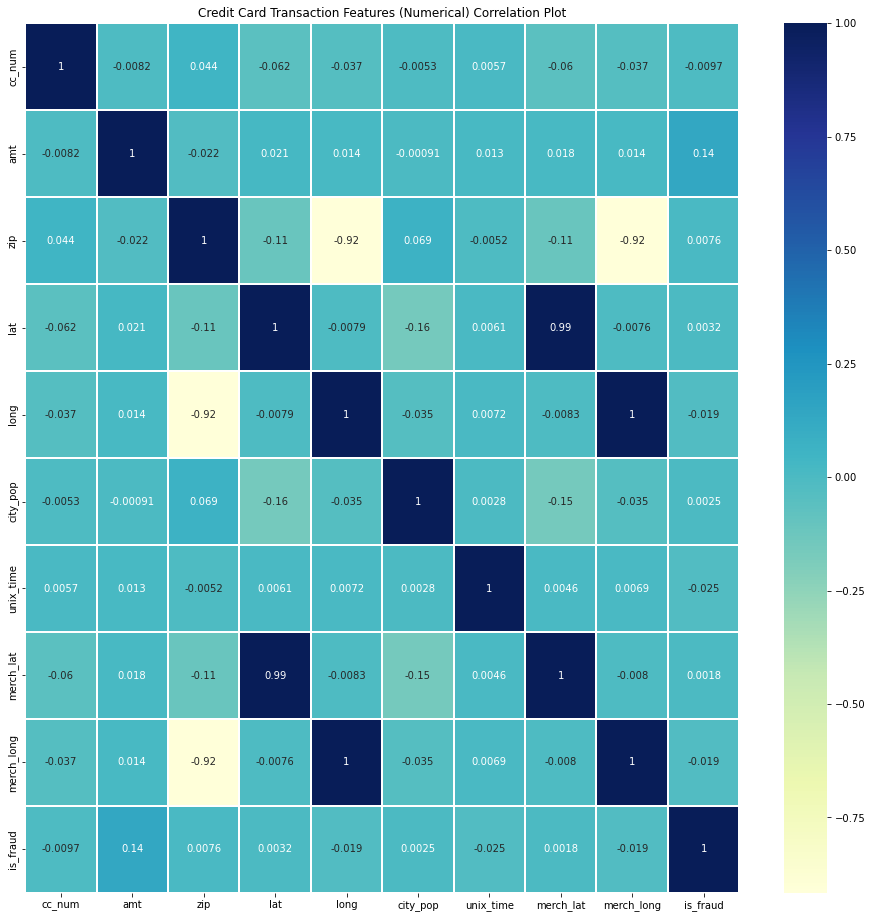

In [11]:
df2 = data.drop(columns='Unnamed: 0')
fig, ax = plt.subplots(figsize=(16,16))
plt.title('Credit Card Transaction Features (Numerical) Correlation Plot')
sns.heatmap(df2.corr(), annot=True, linewidths=.1, cmap="YlGnBu")
plt.show()

We can see from the heatmap that **'amount'** is the **MOST** closely related to **'is_fraud'**. Overall, the correlations seem rather weak and the raw data will **NOT**be very useful in building our model. We will thus have to perform feature engineering to generate better features to obtain better results. 

In [12]:
data.loc[df['is_fraud'] == 1].sort_values('amt', ascending=False).head(1)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2039,480981,2020-12-15 05:48:56,30270432095985,"fraud_Rowe, Batz and Goodwin",grocery_pos,117.24,Lisa,Lin,F,908 Brooks Brook,...,40.6761,-91.0391,725,Environmental consultant,1972-11-28,cac04e503b4ab75cd0b7d5ece2b19c13,1387086536,40.116017,-90.627201,0


We can see that **Julia Bell, Female** was scammed with the highest amount of **$204.39**.

<AxesSubplot:title={'center':'Number of frauds by gender'}, xlabel='gender', ylabel='is_fraud'>

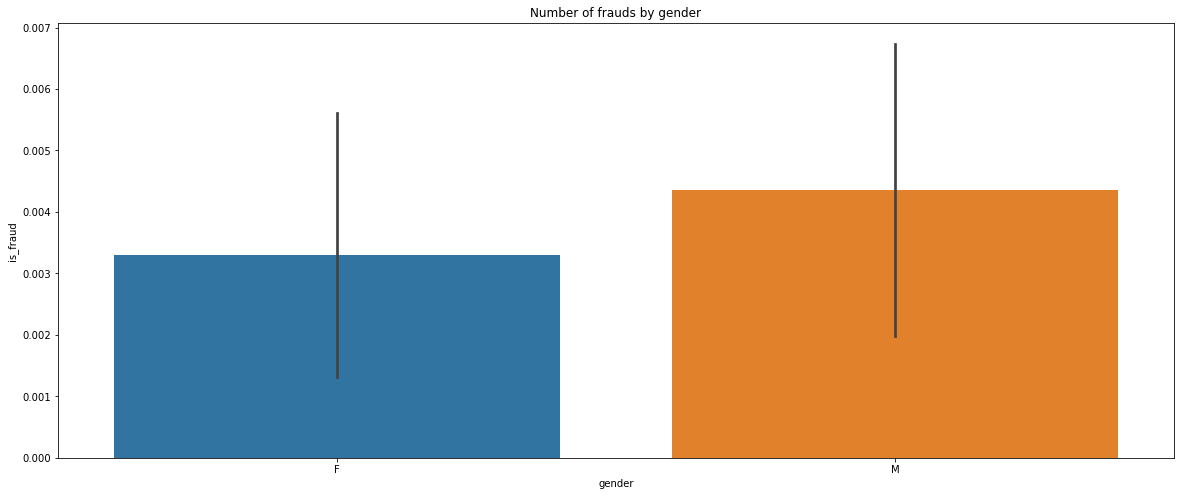

In [13]:
plt.figure(figsize=(20,8))
plt.title('Number of frauds by gender')
sns.barplot(x="gender", y='is_fraud' ,data=data)

From the above barplot diagram we can see that **Females** take up a higher proportion of individuals with fraud transactions.

<AxesSubplot:title={'center':'Number of frauds by category'}, xlabel='category', ylabel='is_fraud'>

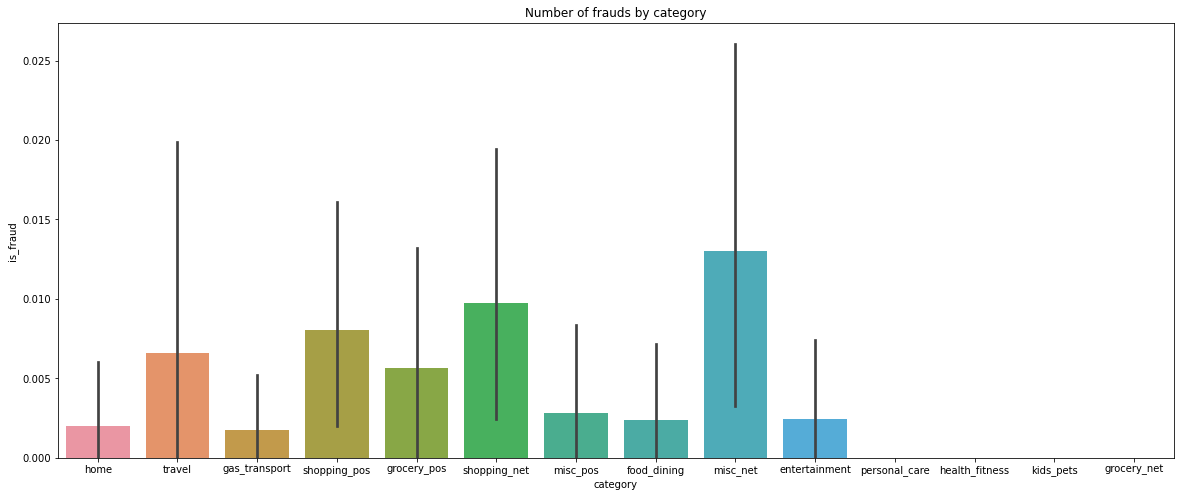

In [14]:
plt.figure(figsize=(20,8))
plt.title('Number of frauds by category')
sns.barplot(x="category", y='is_fraud' ,data=data)

We can also see that the category with the **MOST** number of fraudulant transactions is **grocery_net**

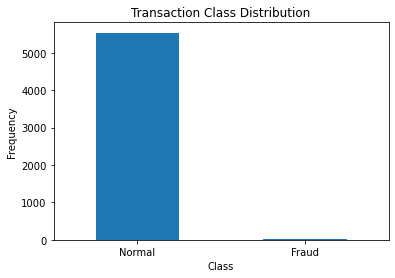

In [15]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['is_fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

<AxesSubplot:xlabel='is_fraud', ylabel='amt'>

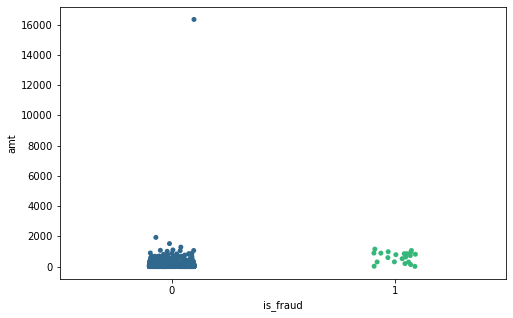

In [16]:
plt.figure(figsize=(8,5))
sns.stripplot(x='is_fraud', y='amt', data=df2, jitter=True, dodge=True, palette='viridis')

We can observe the huge imbalance in data in terms of the variable **'is_fraud'**. We will work on resolving the imbalance issue later using different techniques.

**We will now look at the distributions of some of the variables, Gender and Job as the number of unique values is not too high**

<AxesSubplot:>

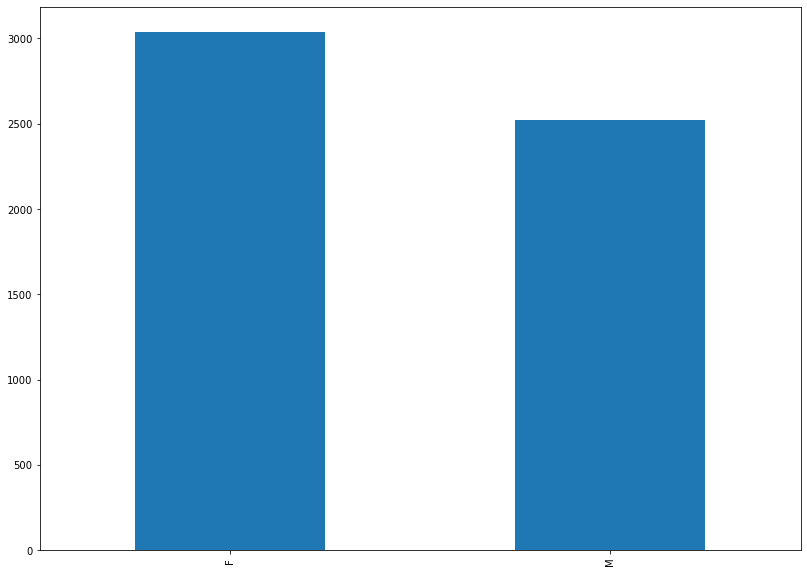

In [17]:
# Distribution of Gender
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
data['gender'].value_counts().plot.bar()

In [18]:
# Specifics
gender = data[['gender','trans_num']].groupby(['gender']).count().reset_index()
gender.columns = ['Gender', 'Total Count']
gender['Percentage'] = (gender['Total Count']/gender['Total Count'].sum())*100
gender

,Gender,Total Count,Percentage
0,F,3034,54.597805
1,M,2523,45.402195


So we can see that there is a greater proportion of the people carrying out the transactions who are **Females**

In [19]:
# In relation to is_fraud
genderf = data[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
genderf.columns = ['Gender','is_fraud','Count']
genderf = genderf.merge(gender[['Gender','Total Count']])
genderf['Percentage'] = (genderf['Count']/genderf['Total Count'].sum())*100
genderf

,Gender,is_fraud,Count,Total Count,Percentage
0,F,0,3024,3034,27.208926
1,F,1,10,3034,0.089977
2,M,0,2512,2523,22.602123
3,M,1,11,2523,0.098974


<AxesSubplot:>

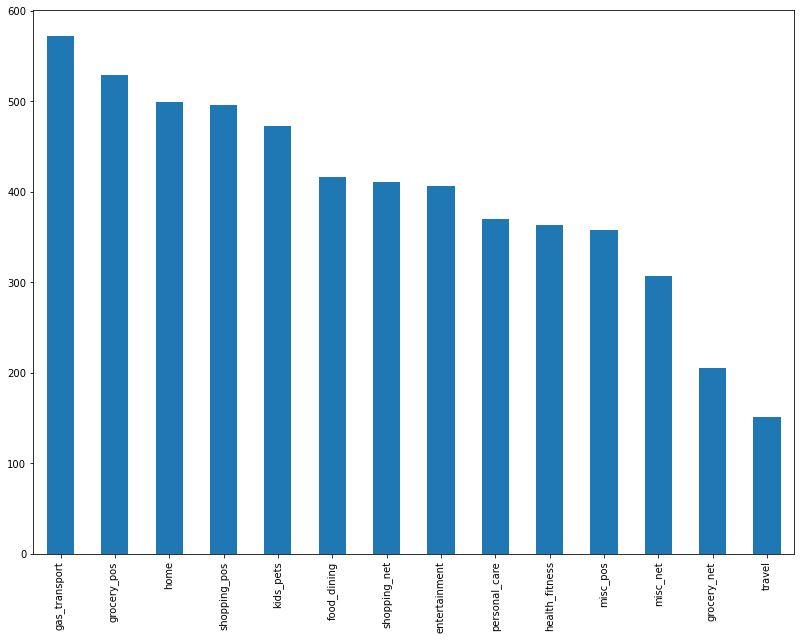

In [20]:
# Distribution of category
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
data['category'].value_counts().plot.bar()

In [21]:
# Specifics
category = data[['category','trans_num']].groupby(['category']).count().reset_index()
category.columns = ['Category', 'Total Count']
category['Percentage'] = (category['Total Count']/category['Total Count'].sum())*100
category.sort_values(by = ['Percentage'], ascending=False).reset_index()
category

,Category,Total Count,Percentage
0,entertainment,406,7.306100
1,food_dining,417,7.504049
2,gas_transport,572,10.293324
3,grocery_net,205,3.689041
4,grocery_pos,529,9.519525
5,health_fitness,363,6.532302
6,home,499,8.979665
7,kids_pets,473,8.511787
8,misc_net,307,5.524564
9,misc_pos,358,6.442325


So we can see that **entertainment** has the highest count amount the rest of the categories

In [22]:
# In relation to is_fraud
categoryf = data[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
categoryf.columns = ['Category','is_fraud','Count']
categoryf = categoryf.merge(category[['Category','Total Count']])
categoryf['Percentage'] = (categoryf['Count']/genderf['Total Count'].sum())*100
categoryf

,Category,is_fraud,Count,Total Count,Percentage
0,entertainment,0,405,406,3.644053
1,entertainment,1,1,406,0.008998
2,food_dining,0,416,417,3.743027
3,food_dining,1,1,417,0.008998
4,gas_transport,0,571,572,5.137664
5,gas_transport,1,1,572,0.008998
6,grocery_net,0,205,205,1.844520
7,grocery_pos,0,526,529,4.732769
8,grocery_pos,1,3,529,0.026993
9,health_fitness,0,363,363,3.266151


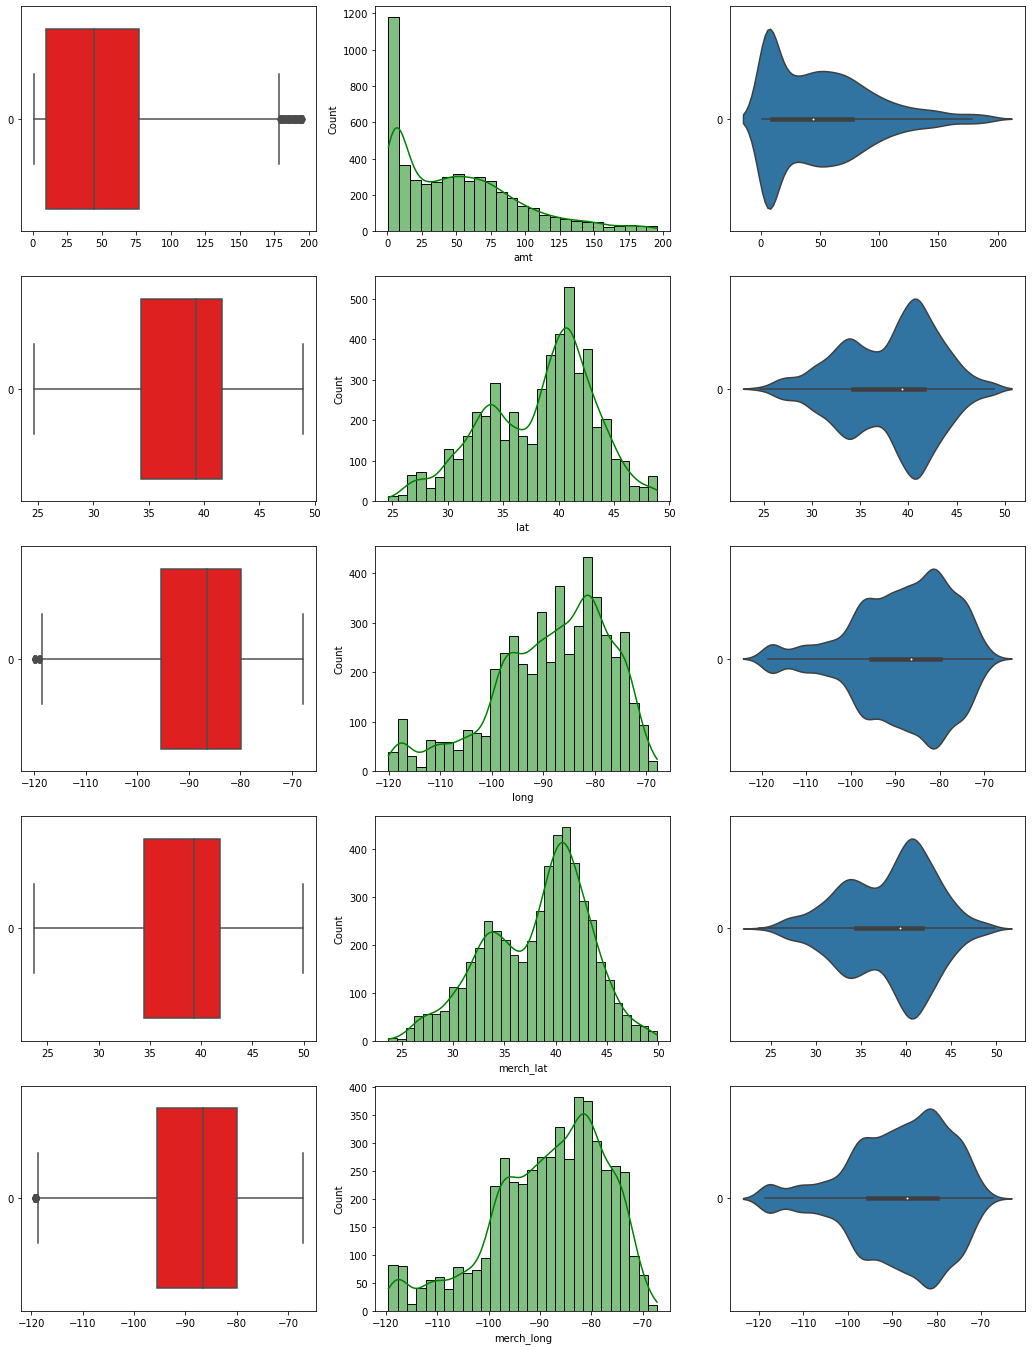

In [49]:
data_numeric = data[['amt', 'lat', 'long', 'merch_lat', 'merch_long']]
# Draw the distributions of all variables
f, axes = plt.subplots(5, 3, figsize=(18, 24))

count = 0
for var in data_numeric:
    sns.boxplot(data = data_numeric[var], orient = "h", ax = axes[count,0],color='red')
    sns.histplot(data = data_numeric[var], ax = axes[count,1], kde = True, color='green')
    sns.violinplot(data = data_numeric[var], orient = "h", ax = axes[count,2])
    count += 1

In [42]:
#remove outlier for all numeric
for var in data_numeric:
    df = data[var]
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    data = data[data[var] >= (Q1 - 1.5 * IQR)]
    data = data[data[var] <= (Q3 + 1.5 * IQR)]

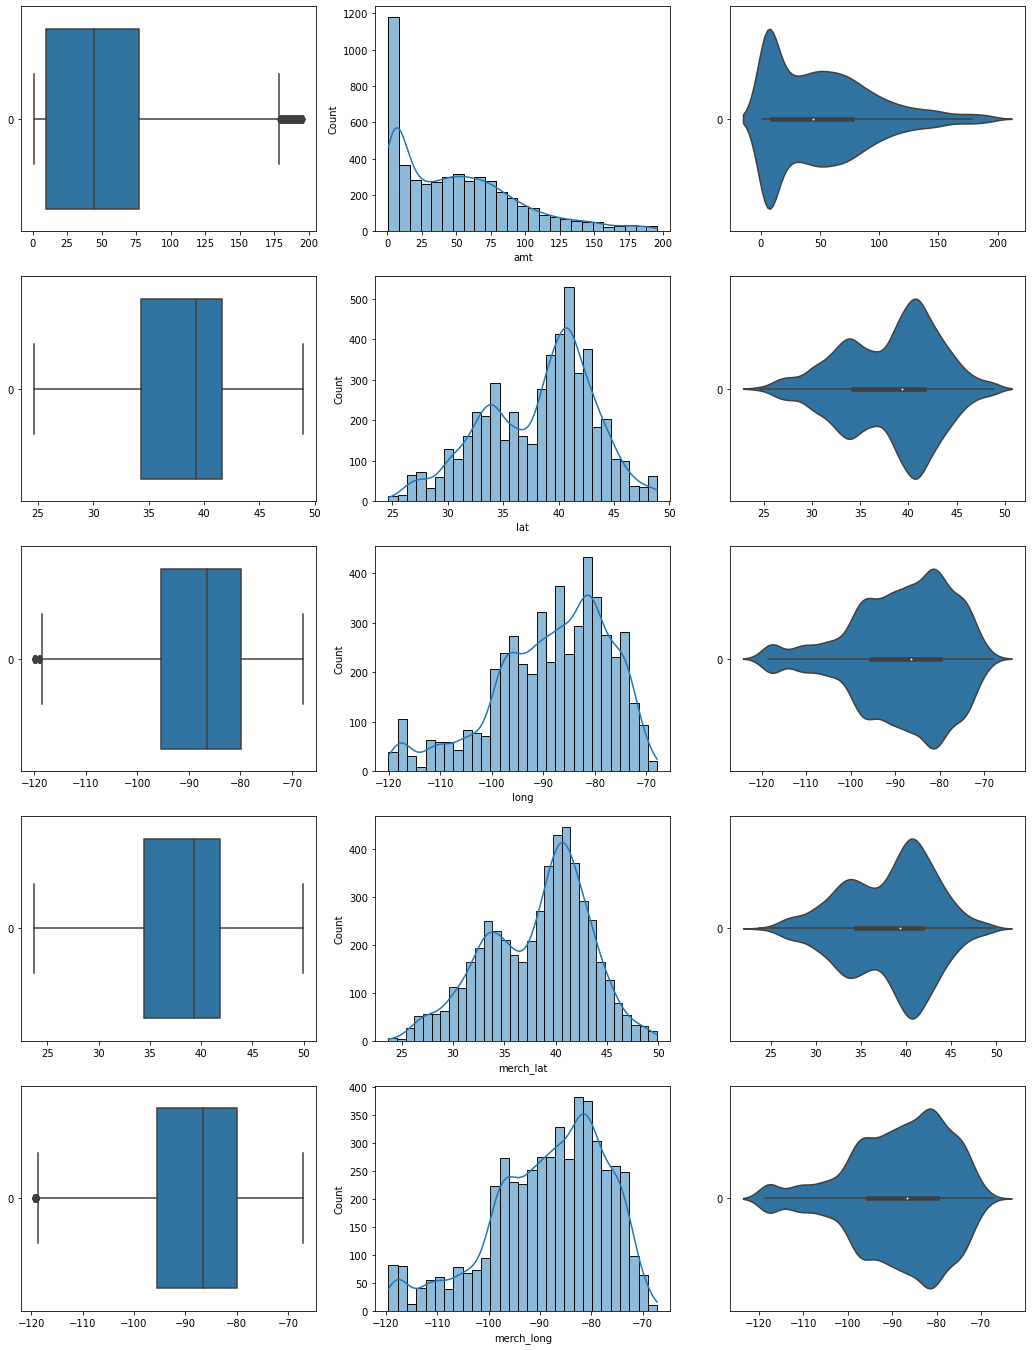

In [43]:
data_numeric = data[['amt', 'lat', 'long', 'merch_lat', 'merch_long']]
# Draw the distributions of all variables
f, axes = plt.subplots(5, 3, figsize=(18, 24))

count = 0
for var in data_numeric:
    sns.boxplot(data = data_numeric[var], orient = "h", ax = axes[count,0])
    sns.histplot(data = data_numeric[var], ax = axes[count,1], kde = True)
    sns.violinplot(data = data_numeric[var], orient = "h", ax = axes[count,2])
    count += 1

In [41]:
sns.pairplot(data,hue="is_fraud")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000020D57D559D0> (for post_execute):


KeyboardInterrupt: 

In [171]:
# Rough Statistics for Amount
pd.concat(
[data['amt'].describe(percentiles = [0.25,0.5,0.75])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
data.loc[data['is_fraud']==0,['amt']].describe(percentiles = [0.25,0.5,0.75])\
.reset_index(drop = 1).rename(columns={'amt':'Non-Fraud Amt Distribution'}),
data.loc[data['is_fraud']==1,['amt']].describe(percentiles = [0.25,0.5,0.75])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

,Row Type,Overall Amt Distribution,Non-Fraud Amt Distribution,Fraud Amt Distribution
0,count,5557.000000,5536.000000,21.000000
1,mean,68.937637,67.665486,404.300952
2,std,117.469015,113.378042,396.621548
3,min,1.000000,1.000000,7.990000
4,25%,9.870000,9.850000,22.020000
5,50%,47.680000,47.550000,288.170000
6,75%,83.690000,83.302500,836.060000
7,max,2848.310000,2848.310000,1022.500000


## Feature Engineering

As we have noticed earlier, we have to generate a few features to help us to obtain a better model.

*(Aggregation process of 2 variables is EXTREMELY slow so avoid that)*

We are able to create new variables to further simplify the variable 'trans_date_trans_time'. The new variables are 
1. **'week_num'**, **'month_num'** and **'year'** for date and 
    **hour**, **minute** and **second** for time.


2. **Hour Encoding**: Normal (0500-2100) | Abnormal (2100-0500) //The hour of the day of the transaction


3. **Frequency of Transactions** in last 1, 7, 30 days from each of the card ids (cc_num)
    - Aggregate by **'cc_num'** 
    - Aggregate by **'merchant'** 


4. **Time since last transaction** from each of the card ids  (cc_num)
    - Aggregate by **'cc_num'** 
    - Aggregate by **'merchant'** 
    
    
5. **Age** (Obtain from transaction date and DOB)


6. **Gender** (One-hot encoding)


7. **Distance** (From lat and long)


8. **Category** (One-hot encoding)

We will also remove the column **'Unnamed: 0'** which represents the index. \

## 1. Time and Date

In [172]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
# Column week number
data['week_number'] = data['trans_date_trans_time'].dt.dayofweek
assert data['week_number'].max() == 6
# Column month number
data['month_number'] = data['trans_date_trans_time'].dt.month
assert data['month_number'].max() == 12
# Column year
data['year'] = data['trans_date_trans_time'].dt.year
# Column hours
data['hour'] = data['trans_date_trans_time'].dt.hour
# Column minutes
data['minute'] = data['trans_date_trans_time'].dt.minute
# Column seconds
data['second'] = data['trans_date_trans_time'].dt.second
#Remove the 'trans_date_trans_time' variable
data = data.drop(columns='Unnamed: 0')
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,week_number,month_number,year,hour,minute,second
0,2020-09-01 09:19:58,180052752563109,"fraud_Raynor, Feest and Miller",gas_transport,7.99,Evan,Santiago,M,9652 Ford Ford Apt. 566,Arlington,...,1378027198,38.557582,-76.779996,1,1,9,2020,9,19,58
1,2020-07-23 23:31:12,4961003488432306,"fraud_Kuhic, Bins and Pfeffer",shopping_net,943.97,Stacy,Walsh,F,324 Donna Ridge Suite 651,Cressona,...,1374622272,40.016579,-75.221864,1,3,7,2020,23,31,12
2,2020-08-02 00:36:13,3577794103155425,fraud_Beier-Hyatt,shopping_pos,957.05,Mary,Humphrey,F,9853 Flynn Hollow Apt. 602,Reynolds,...,1375403773,48.634635,-96.424139,1,6,8,2020,0,36,13
3,2020-08-05 23:54:19,4727244663135968,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,1010.08,Mary,Lewis,F,118 Justin Extension,Bay Minette,...,1375746859,30.355717,-87.019374,1,2,8,2020,23,54,19
4,2020-06-27 22:39:07,3573386445588324,fraud_Zboncak LLC,food_dining,135.82,Stephanie,Murphy,F,526 Stacy Walks,Barnard,...,1372372747,45.419993,-97.823968,1,5,6,2020,22,39,7


## 2. Hour Encoding

In [173]:
# Create a new copy of original dataset before adding the new features
data_new = data

In [174]:
# We use one hot encoding here
data_new['hourEnc'] = 0
data_new.loc[data_new.hour < 5,'hourEnc'] = 1
data_new.loc[data_new.hour > 21,'hourEnc'] = 1

## 3. Frequency of Transactions

**NOTE** that we will be doing aggregation by **'cc_num'**

In [175]:
def last1DayTransCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_1_day').sort_index()
    count_1_day = temp.rolling('1d').count() - 1
    count_1_day.index = temp.values
    x['count_1_day'] = count_1_day.reindex(x.index)
    return x
def last7DaysTransCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_7_days').sort_index()
    count_7_days = temp.rolling('7d').count() - 1
    count_7_days.index = temp.values
    x['count_7_days'] = count_7_days.reindex(x.index)
    return x
def last30DaysTransCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_30_days').sort_index()
    count_30_days = temp.rolling('30d').count() - 1
    count_30_days.index = temp.values
    x['count_30_days'] = count_30_days.reindex(x.index)
    return x

In [176]:
data_new = data_new.groupby('cc_num').apply(last1DayTransCount)
data_new = data_new.groupby('cc_num').apply(last7DaysTransCount)
data_new = data_new.groupby('cc_num').apply(last30DaysTransCount)

**NOTE** that we will try a different aggregation. By **'merchant'**.

In [177]:
def last1DayMerchTransCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_1_merch_day').sort_index()
    count_1_merch_day = temp.rolling('1d').count() - 1
    count_1_merch_day.index = temp.values
    x['count_1_merch_day'] = count_1_merch_day.reindex(x.index)
    return x
def last7DaysMerchTransCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_7_merch_days').sort_index()
    count_7_merch_days = temp.rolling('7d').count() - 1
    count_7_merch_days.index = temp.values
    x['count_7_merch_days'] = count_7_merch_days.reindex(x.index)
    return x
def last30DaysMerchTransCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_30_merch_days').sort_index()
    count_30_merch_days = temp.rolling('30d').count() - 1
    count_30_merch_days.index = temp.values
    x['count_30_merch_days'] = count_30_merch_days.reindex(x.index)
    return x

In [178]:
data_new = data_new.groupby('merchant').apply(last1DayMerchTransCount)
data_new = data_new.groupby('merchant').apply(last7DaysMerchTransCount)
data_new = data_new.groupby('merchant').apply(last30DaysMerchTransCount)

## 4. Time Since Last Transaction (Recency)

In [179]:
def timeDifference(x):
    x['time_diff'] = x.trans_date_trans_time - x.trans_date_trans_time.shift()
    return x

In [180]:
data_new = data_new.groupby('cc_num').apply(timeDifference)
data_new['time_diff'] = data_new['time_diff'].dt.seconds

Aggregation by **'merchant'**.

In [181]:
def timeDifference(x):
    x['time_merch_diff'] = x.trans_date_trans_time - x.trans_date_trans_time.shift()
    return x

In [182]:
data_new = data_new.groupby('merchant').apply(timeDifference)
data_new['time_merch_diff'] = data_new['time_merch_diff'].dt.seconds

We will observe some **NULL** values. This is because x.trans_date_trans_time.shift() does not have certain values. As such, they are displayed as NaN when we apply Python's **.shift( )**. We will replace those NaN values with the numerical value '0'.

In [183]:
data_new = data_new.fillna(0)
data_new.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
week_number              0
month_number             0
year                     0
hour                     0
minute                   0
second                   0
hourEnc                  0
count_1_day              0
count_7_days             0
count_30_days            0
count_1_merch_day        0
count_7_merch_days       0
count_30_merch_days      0
time_diff                0
time_merch_diff          0
d

## 5. Obtaining 'age'

**NOTE** we are finding the age at that point in time. **NOT** current datetime. So we will take transaction datetime to subtract date of birth

In [184]:
data_new['dob'] = pd.to_datetime(data_new['dob'])

data_new['age'] = np.round((data_new['trans_date_trans_time'] - data_new['dob'])/np.timedelta64(1,'Y'))

## 6. Gender One-Hot Encoding

We can do further feature engineering. In the case of gender, since there are only two possible values Male or Female, we can do **One-hot Encoding**. After transformation, **Male = 1** and **Female = 0**.

In [185]:
def gender_encode(x):
    if x=='F':
        return 0
    if x=='M':
        return 1
    
data_new['gender'] = data_new['gender'].transform(gender_encode)

## 7. Distance 

Latitudes and longitudes of the credit card holder and merchant can be combined to create a new variable **'distance'** 

In [186]:
def calculate_Distance(row):
    distance = haversine((row['merch_lat'], row['merch_long']), (row['lat'], row['long']), unit=Unit.MILES)
    return distance

In [187]:
data_new['distance'] = data_new.apply(lambda row: calculate_Distance(row), axis=1)

## 8. Category

From the information on the dataset done during EDA, there are **14** unique values under the variable **'Category'**. As there arent many unique values, we can afford to do one-hot encoding. We do one-hot encoding as it is Nominal Data which cannot work a model so we have to change it to numerical. 

In [188]:
category_onehot = pd.get_dummies(data_new.category, prefix='category')
data_new = data_new.join(category_onehot)

## Display and Comparing Correlations (Old vs New)

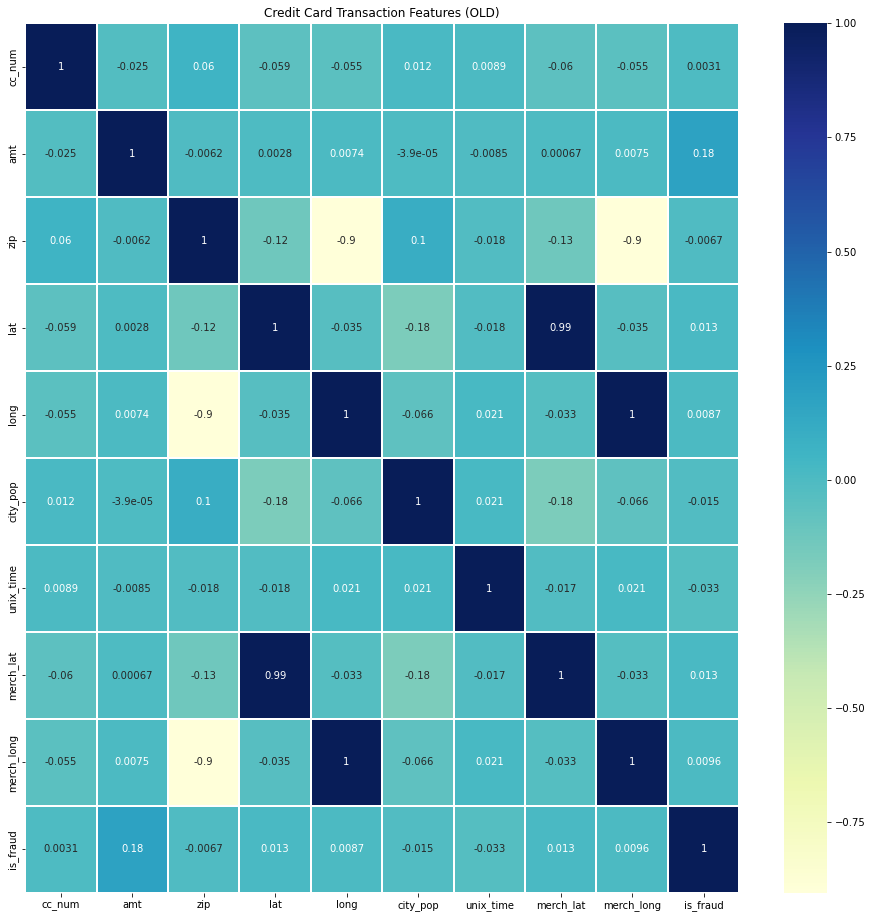

In [190]:
fig, ax = plt.subplots(figsize=(16,16))
plt.title('Credit Card Transaction Features (OLD)')
sns.heatmap(df2.corr(), annot=True, linewidths=.1, cmap="YlGnBu")
plt.show()

We will drop the variable **'year'** in visualising the correlations.

In [191]:
data_new = data_new.drop(columns='year')

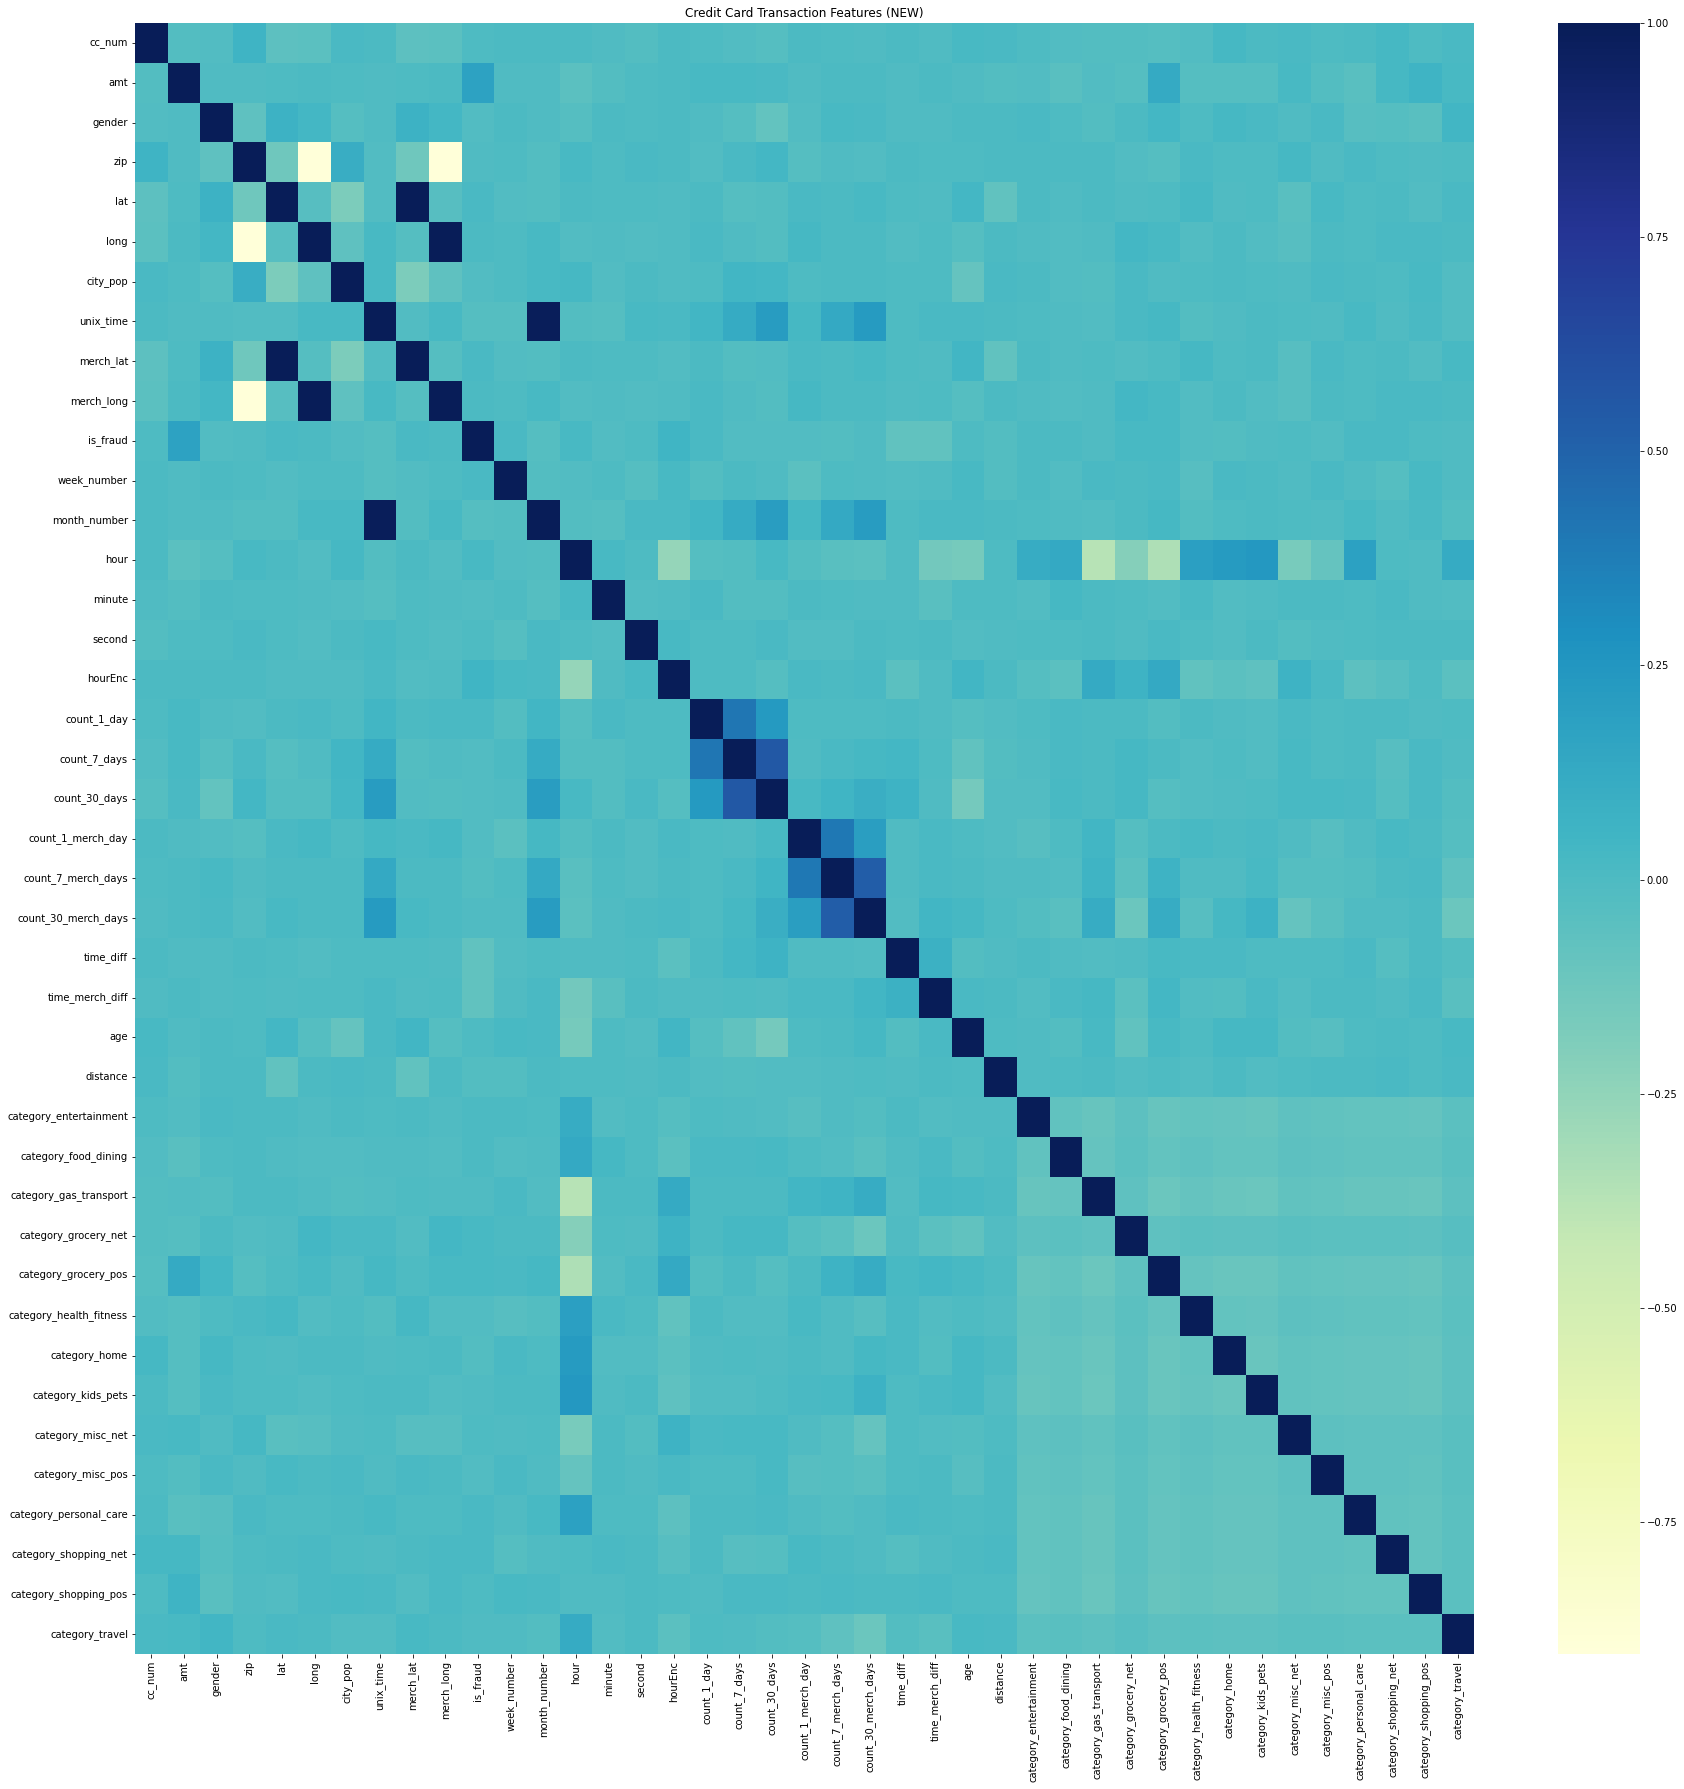

In [196]:
corrdata = data_new[['is_fraud','amt', 'gender', 'age',
       'week_number', 'month_number','hour', 'minute','second','hourEnc',
       'time_diff','time_merch_diff',
       'count_1_day','count_7_days','count_30_days',
       'count_1_merch_day','count_7_merch_days','count_30_merch_days',
       'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel']]
fig, ax = plt.subplots(figsize=(30,30))
plt.title('Credit Card Transaction Features (NEW)')
sns.heatmap(data_new.corr(), cmap="YlGnBu")
plt.show()

In [193]:
data_new.corr()['is_fraud'].abs().sort_values(ascending=False)

is_fraud                   1.000000
amt                        0.175850
time_merch_diff            0.073751
time_diff                  0.072980
hourEnc                    0.055117
unix_time                  0.032882
month_number               0.031225
distance                   0.026124
hour                       0.022856
category_grocery_pos       0.019508
category_home              0.019281
category_grocery_net       0.019273
count_7_merch_days         0.019197
count_30_days              0.017872
category_shopping_net      0.016952
category_personal_care     0.016827
category_health_fitness    0.016804
category_misc_pos          0.015475
gender                     0.014886
city_pop                   0.014647
count_1_merch_day          0.013812
count_1_day                0.013450
merch_lat                  0.012821
lat                        0.012566
minute                     0.012425
week_number                0.012234
count_7_days               0.012069
category_gas_transport     0

We can see that some of the new variables have managed to result in a **higher correlation** with **'is_fraud'**. As such, with this information, we can better extract variables to be used in building the detection model. 

In [194]:
data_new.to_csv(r'data_new.csv',index=False, header=True)